In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

from functools import reduce

In [10]:
import visualize
from importlib import reload

reload(visualize)

<module 'visualize' from '/home/ari/Documents/RLDonkeyCar/analysis/visualize.py'>

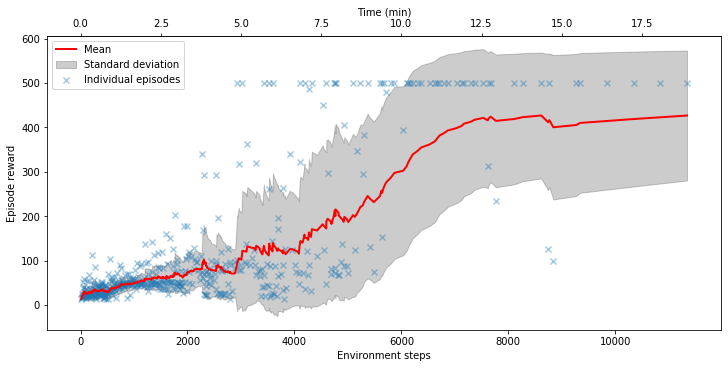

In [11]:
visualize.visualize_ewm_both("../records/real_not_pretrained_critic_encoder_update_fixed/", alpha=0.05)
plt.savefig("results_real_not_pretrained.png")

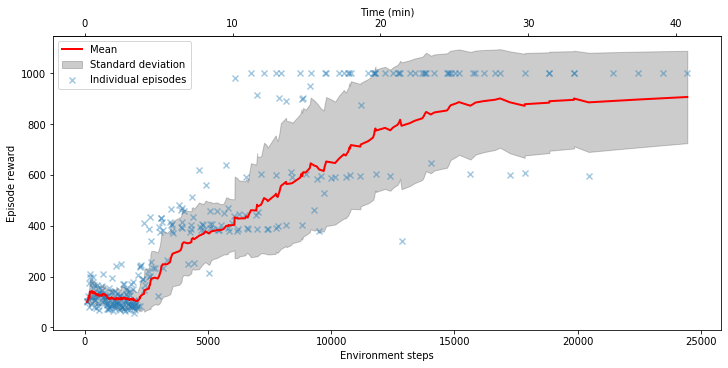

In [12]:
visualize.visualize_ewm_both("../records/sim_not_pretrained_critic_encoder_update_fixed/", alpha=0.05)
plt.savefig("results_sim_not_pretrained.png")

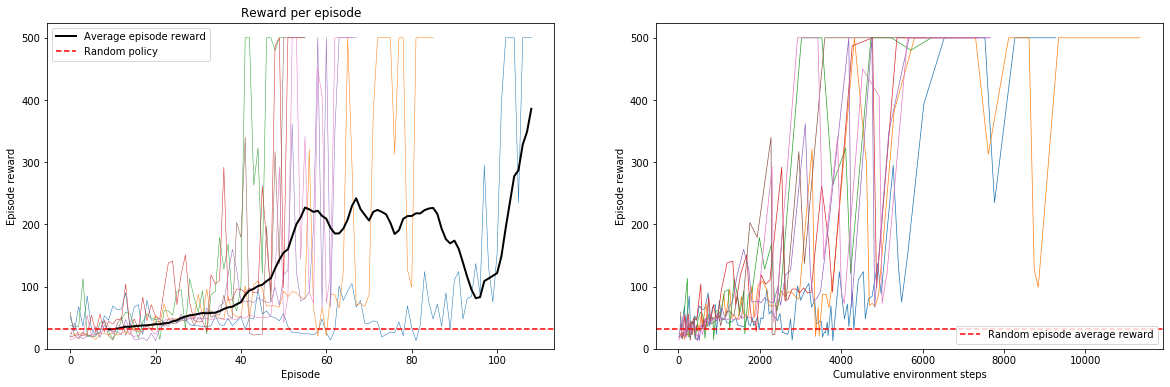

In [13]:
visualize.visualize_run("../records/real_not_pretrained_critic_encoder_update_fixed/")

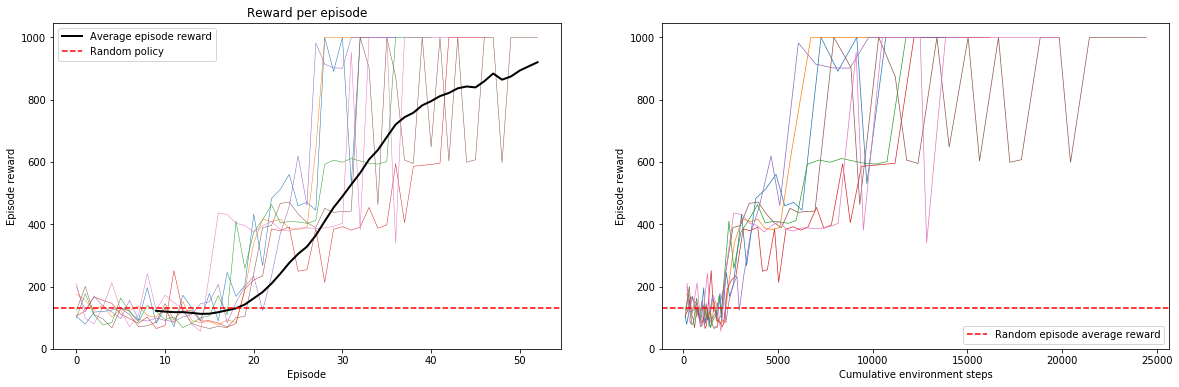

In [14]:
visualize.visualize_run("../records/sim_not_pretrained_critic_encoder_update_fixed/")

In [ ]:
visualize.visualize_ewm_both("../records/real_not_pretrained_critic_encoder_update_fixed/", alpha=0.06)

Run 1, Episodes: 109, Time: 69 minutes
Run 2, Episodes: 86, Time: 58 minutes
Run 3, Episodes: 51, Time: 34 minutes
Run 4, Episodes: 56, Time: 39 minutes
Run 5, Episodes: 68, Time: 40 minutes
Run 6, Episodes: 56, Time: 39 minutes
Run 7, Episodes: 67, Time: 44 minutes


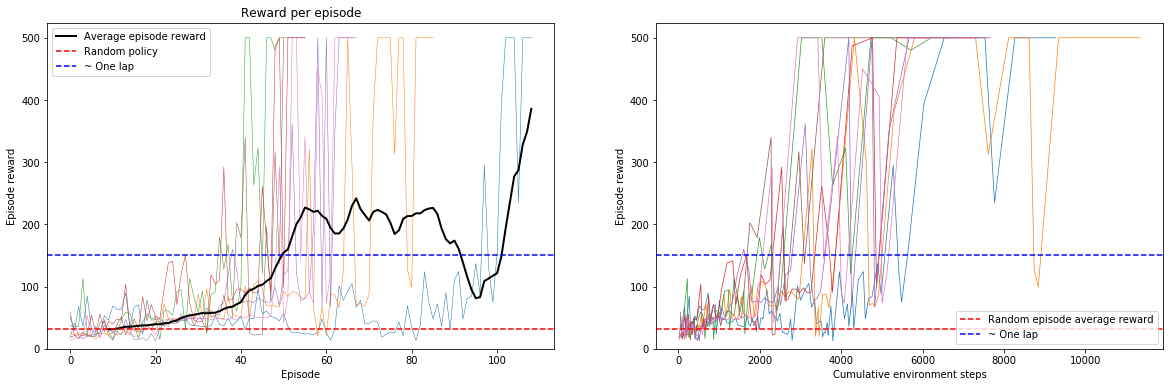

In [25]:
visualize.visualize_run("../records/real_not_pretrained_critic_encoder_update_fixed/", real_car=True)

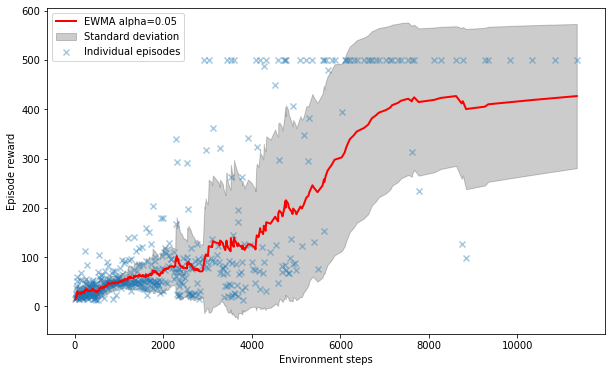

In [5]:
visualize.visualize_ewm("../records/real_not_pretrained_critic_encoder_update_fixed/")

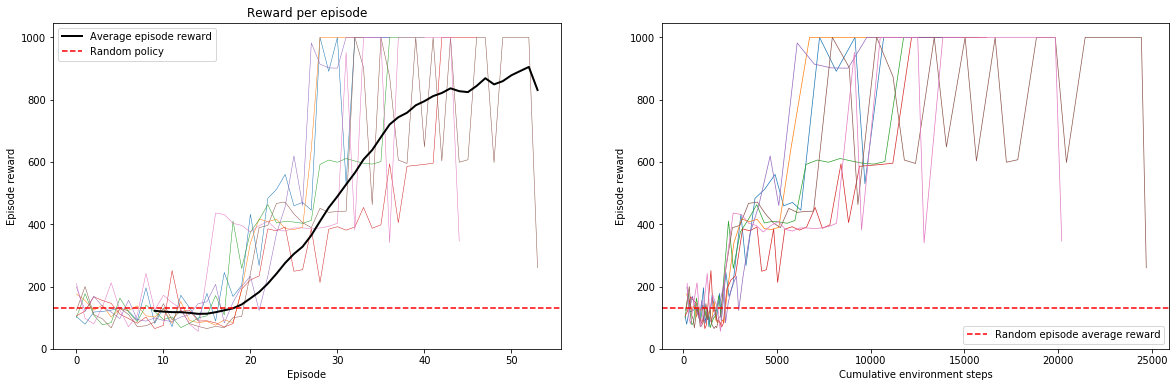

In [6]:
visualize.visualize_run("../records/sim_not_pretrained_critic_encoder_update_fixed/")

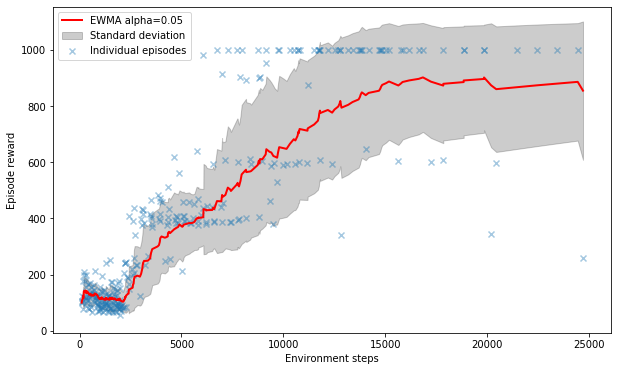

AttributeError: module 'matplotlib.pyplot' has no attribute 'secondary_axis'

In [8]:
visualize.visualize_ewm("../records/sim_not_pretrained_critic_encoder_update_fixed/")


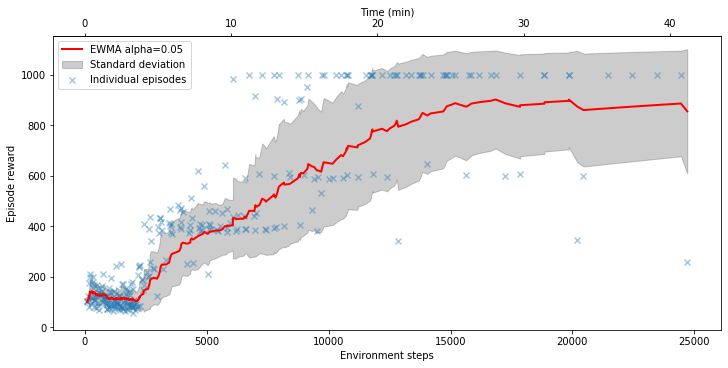

In [22]:
folder = "../records/sim_not_pretrained_critic_encoder_update_fixed/"
alpha = 0.05
frames = [pd.read_csv(folder + x, sep=";") for x in os.listdir(folder)]
frames = [f for f in frames if len(f) > 0]

rewards = [f["Reward"] for f in frames if len(f) > 0]

steprewards = pd.concat([pd.DataFrame({"step": f["Reward"].cumsum(), "reward": f["Reward"]}) for f in frames]).sort_values("step")

ewm = steprewards["reward"].ewm(alpha=alpha).mean()
std = steprewards["reward"].ewm(alpha=alpha).std()



fig, ax = plt.subplots(constrained_layout=True)
fig.set_size_inches((10, 5))
ax.fill_between(steprewards["step"], ewm - std, ewm + std, alpha=0.2, color="k", label="Standard deviation")
ax.scatter(steprewards["step"], steprewards["reward"], marker="x", alpha=0.4, label="Individual episodes")
ax.plot(steprewards["step"], ewm, label="EWMA alpha=0.05", linewidth=2, color="red")
ax.set_xlabel("Environment steps")
ax.set_ylabel("Episode reward")
ax.legend(loc="upper left")

secax = ax.secondary_xaxis("top", functions=(lambda x: x / 600, lambda x: x * 600))
secax.set_xlabel("Time (min)")

plt.show()

Run 1, Episodes: 100, Time: 54 minutes
Run 2, Episodes: 100, Time: 68 minutes
Run 3, Episodes: 85, Time: 50 minutes
Run 4, Episodes: 169, Time: 80 minutes


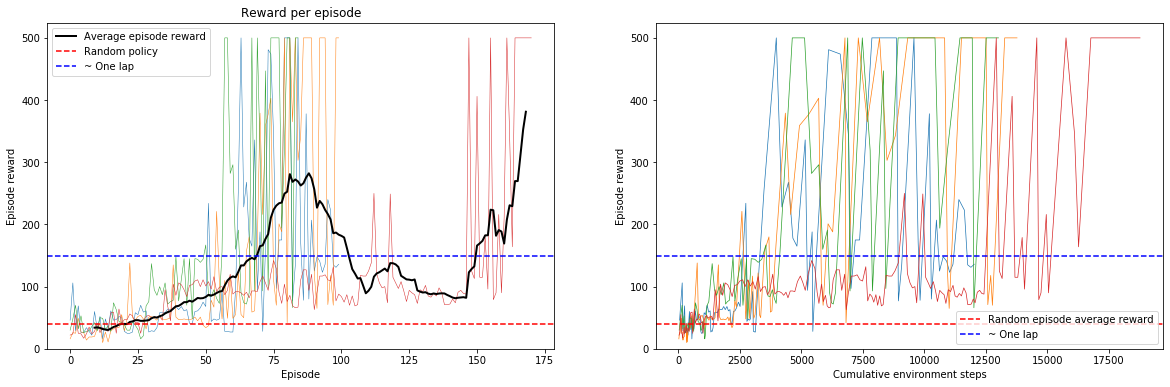

In [19]:
visualize.visualize_run("../records/real_pretrained_1/", real_car=True)

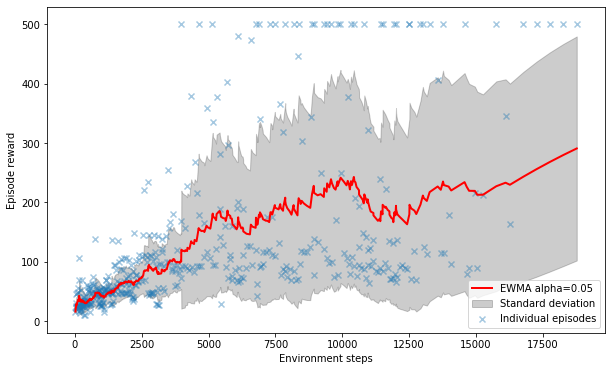

In [20]:
visualize.visualize_ewm("../records/real_pretrained_1/")

Run 1, Episodes: 57, Time: 42 minutes
Run 2, Episodes: 64, Time: 43 minutes
Run 3, Episodes: 73, Time: 48 minutes


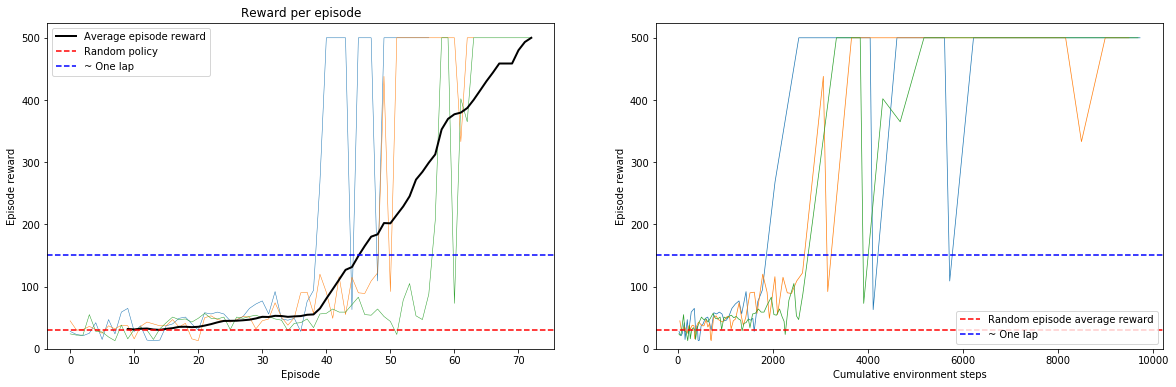

In [39]:
visualize.visualize_run("../records/real_not_pretrained_10k_steps_home/", real_car=True)

# Results

## Real car
###  From scratch

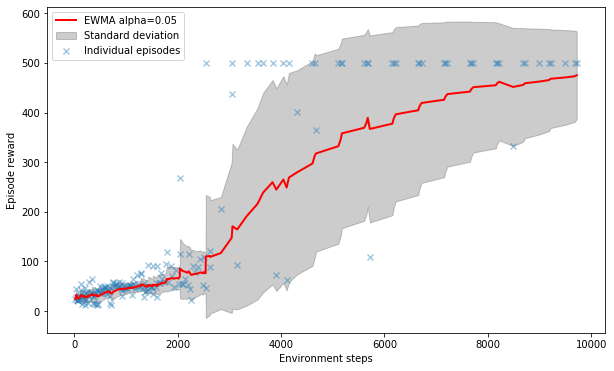

In [89]:
visualize.visualize_ewm("../records/real_not_pretrained_10k_steps_home/", alpha = 0.08)

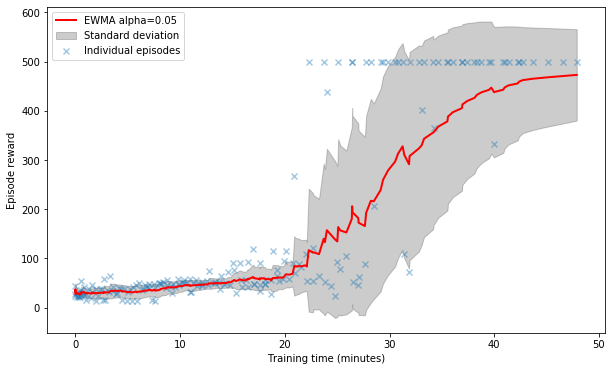

In [90]:
visualize.visualize_ewm_time("../records/real_not_pretrained_10k_steps_home/", alpha = 0.08)

### Initalized with pretrained encoder

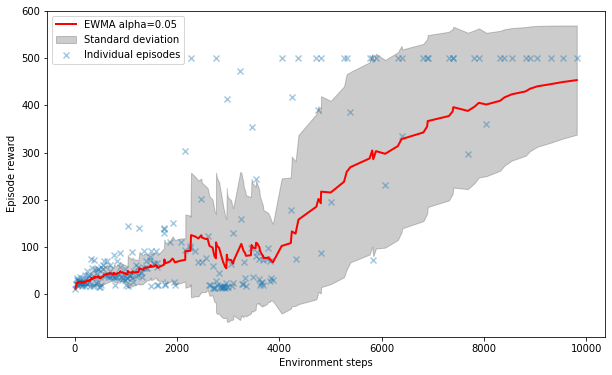

In [91]:
visualize.visualize_ewm("../records/real_pretrained_encoder_update_10k_steps_home/", alpha = 0.08)

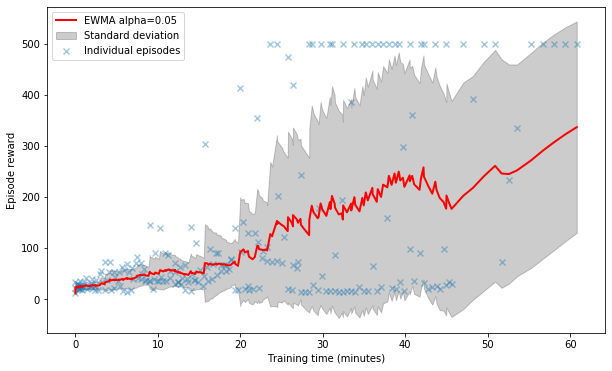

In [104]:
visualize.visualize_ewm_time("../records/real_pretrained_encoder_update_10k_steps_home/", alpha = 0.08)

### Pretrained encoder

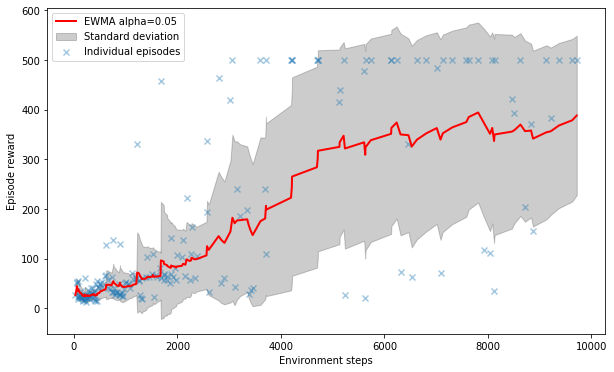

In [99]:
visualize.visualize_ewm("../records/real_pretrained_10k_steps_home/", alpha = 0.08)

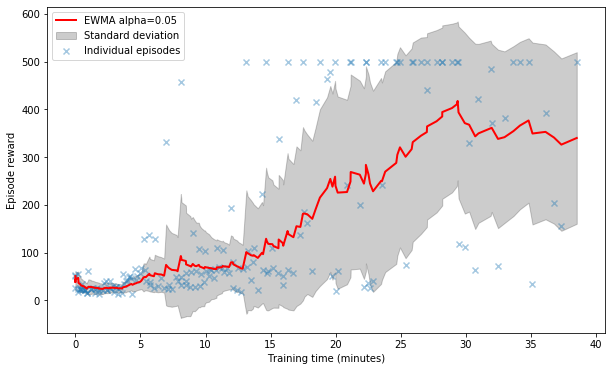

In [103]:
visualize.visualize_ewm_time("../records/real_pretrained_10k_steps_home/", alpha = 0.08)

## Simulator

### From scratch

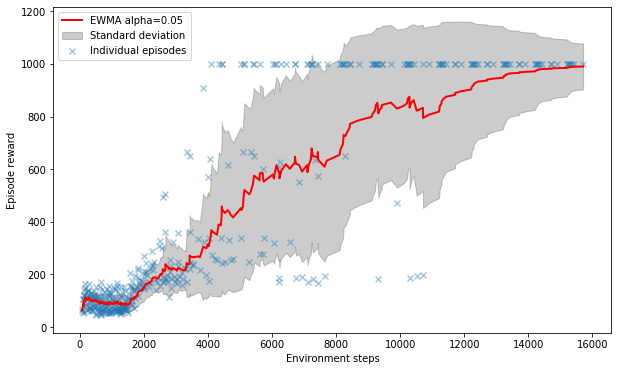

In [106]:
visualize.visualize_ewm("../records/sim_not_pretrained_15k_steps_1000_episode/", alpha = 0.06)

### Initialize with pretrained encoder 

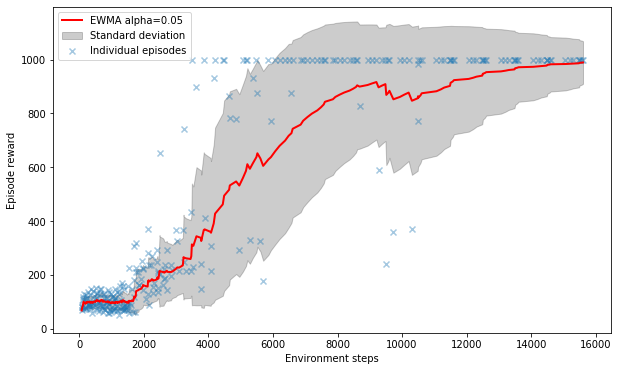

In [101]:
visualize.visualize_ewm("../records/sim_pretrained_encoder_update_15k_steps_1000_episode/", alpha = 0.06)

### Pretrained encoder

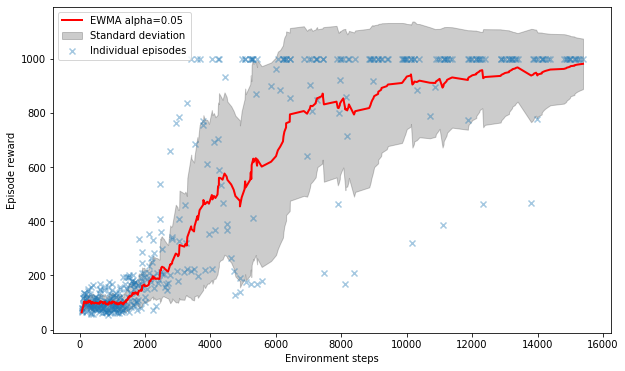

In [102]:
visualize.visualize_ewm("../records/sim_pretrained_15k_steps_1000_episode/", alpha = 0.06)

### Demo video

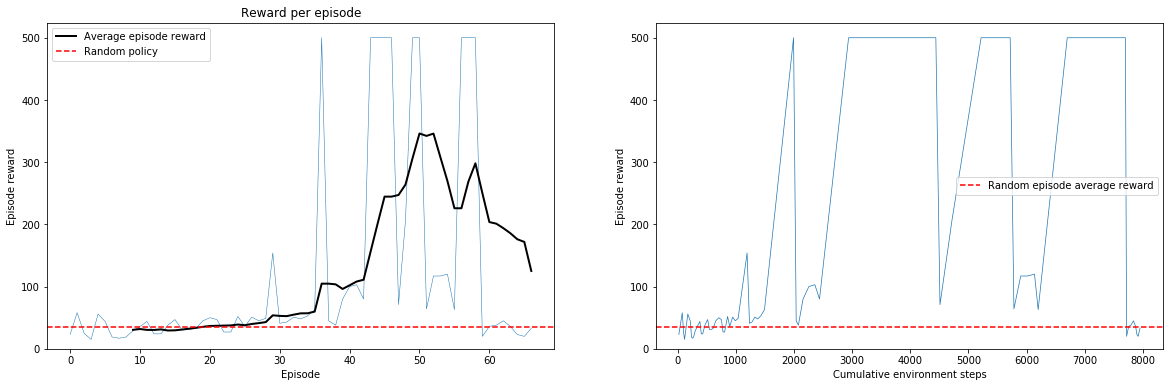

In [3]:
visualize.visualize_run("../records/real_scratch_10k_steps_demo_video/")

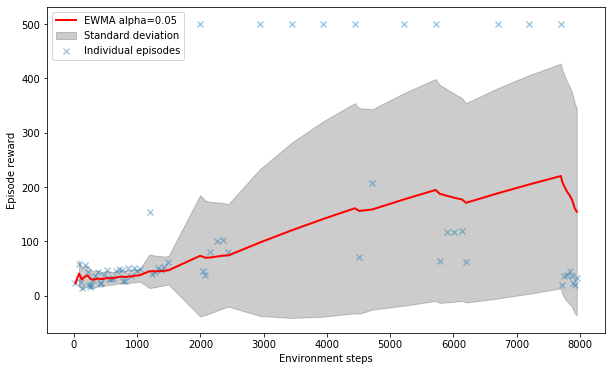

In [4]:
visualize.visualize_ewm("../records/real_scratch_10k_steps_demo_video/")

In [1]:
import pandas as pd

In [12]:
data = pd.read_csv("../records/real_scratch_10k_steps_demo_video/log_sac_2020-07-28T03:20:07.969123.csv", sep=";")
data = data.iloc[:-8]
data["Time"] = data.Time.astype("datetime64")

In [13]:
data.sum()

Episode    1711
Steps      8239
Reward     7700
dtype: int64

In [29]:
(data.Time.values[28] - data.Time.values[0]) / 1e9 / 60

numpy.timedelta64(13,'ns')

# data.Steps.cumsum()

data.iloc[29]

In [27]:
(data.Time.values[-1] - data.Time.values[0]) / 1e9 / 60

numpy.timedelta64(38,'ns')

In [28]:
data.Steps.cumsum()

0       34
1      103
2      139
3      165
4      232
5      287
6      317
7      345
8      375
9      415
10     462
11     517
12     552
13     587
14     636
15     694
16     736
17     778
18     822
19     878
20     939
21     997
22    1035
23    1073
24    1136
25    1183
26    1245
27    1301
28    1361
29    1526
30    1578
31    1632
32    1694
33    1753
34    1817
35    1891
36    2391
37    2447
38    2496
39    2587
40    2698
41    2812
42    2903
43    3403
44    3903
45    4403
46    4903
47    4985
48    5203
49    5703
50    6203
51    6278
52    6406
53    6534
54    6665
55    6739
56    7239
57    7739
58    8239
Name: Steps, dtype: int64

### 